In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import csv
import os

# 1. Data

## 1.1 Load

In [3]:
path = "E://Nour_//FCAI//4.2//Pattern//Assignments//Assignment_2-Nour_Mostafa-20190591//dataset/plastic"
dir_list = os.listdir(path)

In [4]:
len(dir_list)

100

In [5]:
for image_path in dir_list:
    print(image_path)

plastic_moderate_001_new.jpg
plastic_moderate_002_new.jpg
plastic_moderate_003_new.jpg
plastic_moderate_004_new.jpg
plastic_moderate_005_new.jpg
plastic_moderate_006_new.jpg
plastic_moderate_007_new.jpg
plastic_moderate_008_new.jpg
plastic_moderate_009_new.jpg
plastic_moderate_010_new.jpg
plastic_moderate_011_new.jpg
plastic_moderate_012_new.jpg
plastic_moderate_013_new.jpg
plastic_moderate_014_new.jpg
plastic_moderate_015_new.jpg
plastic_moderate_016_new.jpg
plastic_moderate_017_new.jpg
plastic_moderate_018_new.jpg
plastic_moderate_019_new.jpg
plastic_moderate_020_new.jpg
plastic_moderate_021_new.jpg
plastic_moderate_022_new.jpg
plastic_moderate_023_new.jpg
plastic_moderate_024_new.jpg
plastic_moderate_025_new.jpg
plastic_moderate_026_new.jpg
plastic_moderate_027_new.jpg
plastic_moderate_028_new.jpg
plastic_moderate_029_new.jpg
plastic_moderate_030_new.jpg
plastic_moderate_031_new.jpg
plastic_moderate_032_new.jpg
plastic_moderate_033_new.jpg
plastic_moderate_034_new.jpg
plastic_modera

In [6]:
image_as_numpyArray_list = []

In [7]:
for image_path in dir_list:
    img = Image.open("dataset/plastic/"+image_path).convert('L')
    img = img.resize((50,50))
    Image_arr = np.asarray(img)
    image_as_numpyArray_list.append(Image_arr)

In [8]:
image_as_numpyArray_list[0].shape

(50, 50)

# 2. Helper Function

## 2.1. GLCM 

In [9]:
def split_to_windows (img_as_arr, angle):

    windows = []

    for row in range (img_as_arr.shape[0]):
        for col in range (img_as_arr.shape[1]):

            if angle ==0 :

                if col == img_as_arr.shape[1]-1:
                    break

                win = np.array([img_as_arr[row,col],img_as_arr[row,col+1]])

            elif angle == -90:

                if row == img_as_arr.shape[0]-1:
                    break
                win = np.array([img_as_arr[row,col],img_as_arr[row+1,col]])
            
            windows.append(win)


    return windows

In [10]:
def create_GLCM (windows, values):

    glc  = np.empty([len(values),len(values)])

    for start_value in range (len(values)):
    
        for target_value in range (len(values)):
            count = 0
            for win in windows:
                if win[0] == start_value and win[1] == target_value:
                    count = count + 1

            glc [start_value,target_value] = count

    
    return glc / np.sum(glc)

## 2.2. Features

### 2.2.1. Mean and Sigma

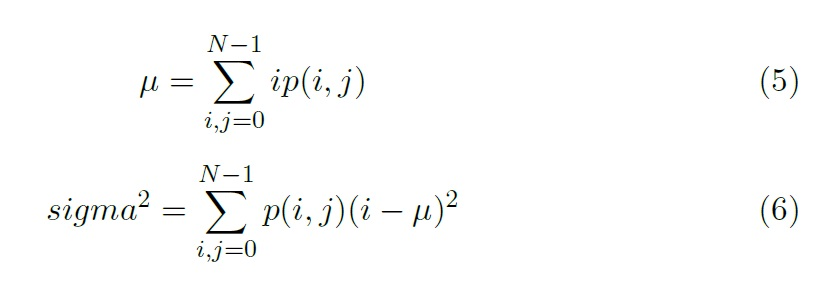

In [11]:
def Calculate_Mean (glc):

    mean_i = 0
    mean_j = 0

    for i in range (glc.shape[0]):
        for j in range (glc.shape[1]):
                mean_i = mean_i + (i*glc[i,j])
                mean_j = mean_j + (j*glc[i,j])
    
    return mean_i , mean_j

In [12]:
def Calculate_Sigma (glc):

    sigma_square_i = 0
    sigma_square_j = 0

    mean_i , mean_j = Calculate_Mean (glc)

    for i in range (glc.shape[0]):
        for j in range (glc.shape[1]):
                sigma_square_i = sigma_square_i + (glc[i,j]*((i-mean_i)**2))
                sigma_square_j = sigma_square_j + (glc[i,j]*((j-mean_j)**2))

    return np.sqrt(sigma_square_i), np.sqrt(sigma_square_j) 

### 2.2.2. Contrast

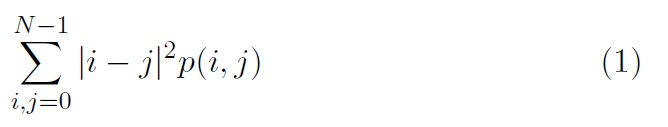

In [13]:
def Calculate_contrast (glc):

    contrast = 0

    for i in range (glc.shape[0]):
        for j in range (glc.shape[1]):
            contrast = contrast + (((np.abs(i-j))**2) * glc[i,j])

    return contrast

### 2.2.3. Correlation

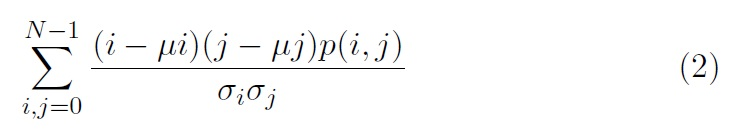

In [14]:
def Calculate_Correlation (glc):

    Correlation = 0
    
    mean_i, mean_j = Calculate_Mean (glc)

    sigma_i , sigma_j = Calculate_Sigma (glc)

    for i in range (glc.shape[0]):
        for j in range (glc.shape[1]):
                numerator = (i - mean_i) * (j - mean_j) * (glc[i,j])
                denominator = sigma_i * sigma_j
                Correlation = Correlation + (numerator / denominator)

    return Correlation

### 2.2.4. Energy

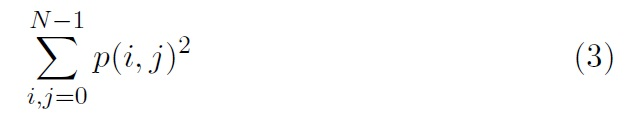

In [15]:
def Calculate_Energy (glc):

    Energy = 0

    for i in range (glc.shape[0]):
        for j in range (glc.shape[1]):
           Energy = Energy + (glc[i,j])**2 

    return Energy

### 2.2.5. Homogeneity

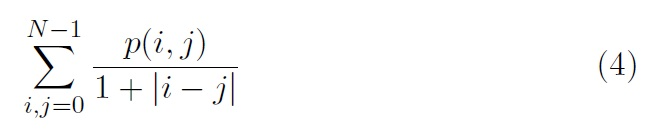

In [16]:
def Calculate_Homogeneity (glc):

    Homogeneity = 0

    for i in range (glc.shape[0]):
        for j in range (glc.shape[1]):
                Homogeneity = Homogeneity + (glc[i,j] / (1 + np.abs(i-j) ))

    return Homogeneity 

# 3. Extract Features

## 3.1 For one Image

In [17]:
def Extract_feature_img (img_as_arr):

    values = [i for i in range (0,np.max(img_as_arr)+1)]

    windows_left = split_to_windows (img_as_arr, 0)

    glc_left= create_GLCM (windows_left, values)

    contrast_left = Calculate_contrast (glc_left)

    Correlation_left = Calculate_Correlation (glc_left)

    Energy_left = Calculate_Energy (glc_left)

    Homogeneity_left = Calculate_Homogeneity (glc_left)



    """windows_below = split_to_windows (img_as_arr, -90)

    glc_below= create_GLCM (windows_below, values)

    contrast_below = Calculate_contrast (glc_below)

    Correlation_below = Calculate_Correlation (glc_below)

    Energy_below = Calculate_Energy (glc_below)

    Homogeneity_below = Calculate_Homogeneity (glc_below)"""

    features_list = [contrast_left, Correlation_left, Energy_left, Homogeneity_left]

    return features_list

In [18]:
"""header = ['contrast_left', 'Correlation_left', 'Energy_left', 'Homogeneity_left', 'lable' ]

with open('data/features.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)

    # write the header
    writer.writerow(header)

    label = 'test'
    data = [1.48098776e+02, 8.70376201e-01, 7.28029988e-04, 2.11172579e-01]
    data.append(label)


    writer.writerow(data)

    """

"header = ['contrast_left', 'Correlation_left', 'Energy_left', 'Homogeneity_left', 'lable' ]\n\nwith open('data/features.csv', 'w', encoding='UTF8', newline='') as f:\n    writer = csv.writer(f)\n\n    # write the header\n    writer.writerow(header)\n\n    label = 'test'\n    data = [1.48098776e+02, 8.70376201e-01, 7.28029988e-04, 2.11172579e-01]\n    data.append(label)\n\n\n    writer.writerow(data)\n\n    "

## 3.2 For Data

In [19]:
def extract_features_data (images_as_array, label):

    header = ['ID','contrast_left', 'Correlation_left', 'Energy_left', 'Homogeneity_left', 'lable' ]

    with open('data/features_plastic.csv', 'w', encoding='UTF8', newline='') as f:

        writer = csv.writer(f)

        writer.writerow(header)

        counter = 0

        
        for arr in images_as_array:

            data = Extract_feature_img (arr)

            data.insert(0,counter)
        
            data.append(label)

            print ("(", counter+1,"/100)")

            counter = counter + 1

            writer.writerow(data)


In [19]:
sub_list = image_as_numpyArray_list[0:2]

In [20]:
extract_features_data (image_as_numpyArray_list, "plastic")

( 1 /100)
( 2 /100)
( 3 /100)
( 4 /100)
( 5 /100)
( 6 /100)
( 7 /100)
( 8 /100)
( 9 /100)
( 10 /100)
( 11 /100)
( 12 /100)
( 13 /100)
( 14 /100)
( 15 /100)
( 16 /100)
( 17 /100)
( 18 /100)
( 19 /100)
( 20 /100)
( 21 /100)
( 22 /100)
( 23 /100)
( 24 /100)
( 25 /100)
( 26 /100)
( 27 /100)
( 28 /100)
( 29 /100)
( 30 /100)
( 31 /100)
( 32 /100)
( 33 /100)
( 34 /100)
( 35 /100)
( 36 /100)
( 37 /100)
( 38 /100)
( 39 /100)
( 40 /100)
( 41 /100)
( 42 /100)
( 43 /100)
( 44 /100)
( 45 /100)
( 46 /100)
( 47 /100)
( 48 /100)
( 49 /100)
( 50 /100)
( 51 /100)
( 52 /100)
( 53 /100)
( 54 /100)
( 55 /100)
( 56 /100)
( 57 /100)
( 58 /100)
( 59 /100)
( 60 /100)
( 61 /100)
( 62 /100)
( 63 /100)
( 64 /100)
( 65 /100)
( 66 /100)
( 67 /100)
( 68 /100)
( 69 /100)
( 70 /100)
( 71 /100)
( 72 /100)
( 73 /100)
( 74 /100)
( 75 /100)
( 76 /100)
( 77 /100)
( 78 /100)
( 79 /100)
( 80 /100)
( 81 /100)
( 82 /100)
( 83 /100)
( 84 /100)
( 85 /100)
( 86 /100)
( 87 /100)
( 88 /100)
( 89 /100)
( 90 /100)
( 91 /100)
( 92 /10